In [83]:
  import pandas as pd


df = pd.read_csv("/content/user_profiles_for_ads.csv")


null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

print("\nColumn Information:")
print(df.info())


print("\nDescriptive Statistics:")
print(df.describe())


Null Values:
User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Ge

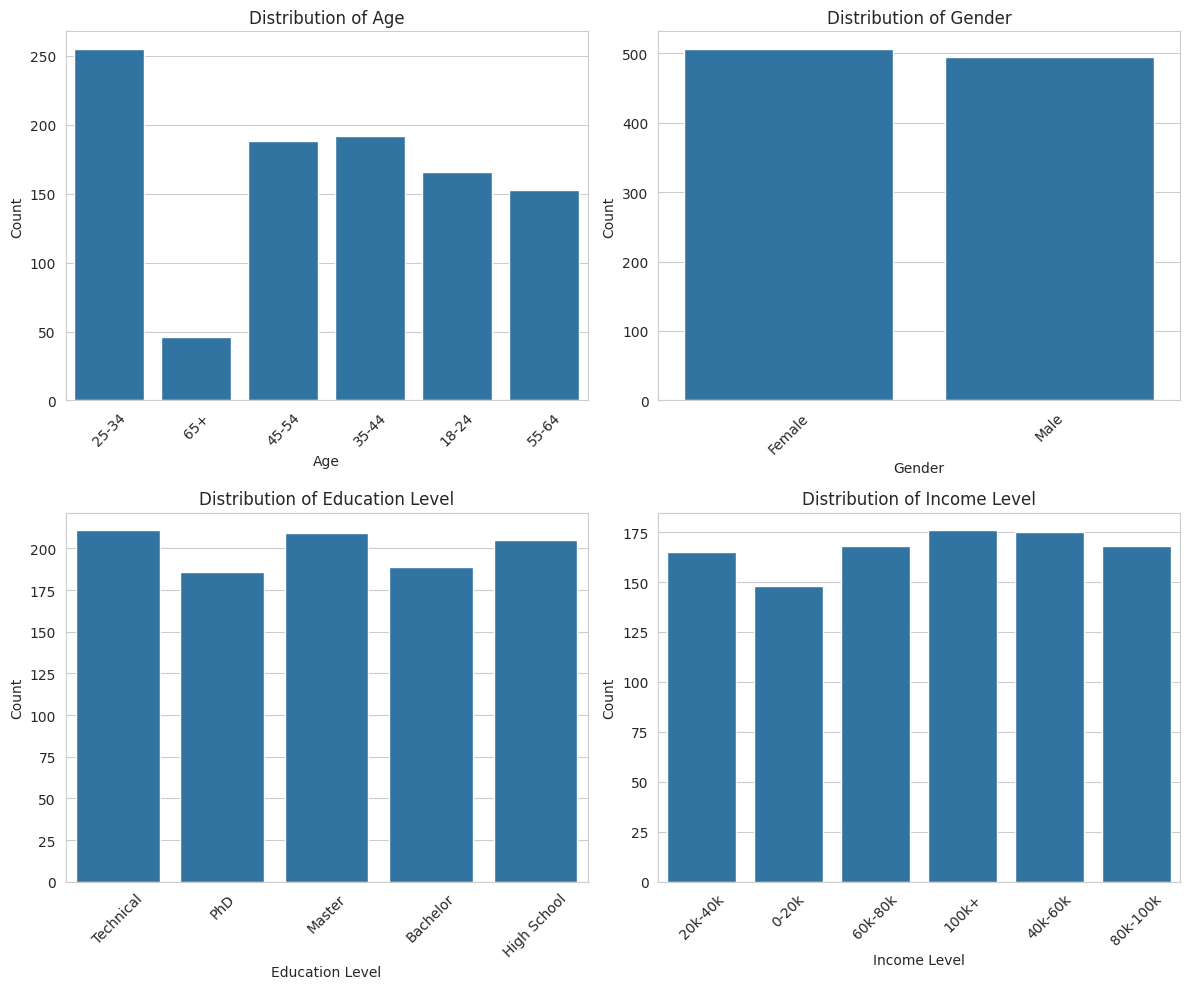

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

# Define the key demographic variables
demographic_vars = ['Age', 'Gender', 'Education Level', 'Income Level']

# Create subplots for each demographic variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through each demographic variable and create a count plot
for i, var in enumerate(demographic_vars):
    row = i // 2
    col = i % 2
    sns.countplot(x=var, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


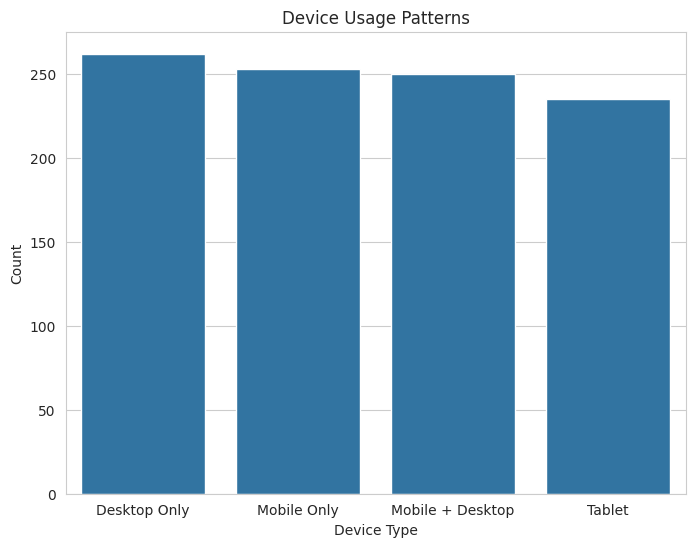

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Device usage patterns
plt.figure(figsize=(8, 6))
device_counts = df['Device Usage'].value_counts()
sns.barplot(x=device_counts.index, y=device_counts.values)
plt.title('Device Usage Patterns')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()





<ipython-input-86-77e0f87e1461>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time Spent Online (hrs/weekday)', y='Time Spent Online (hrs/weekend)', data=df, palette='Set2')


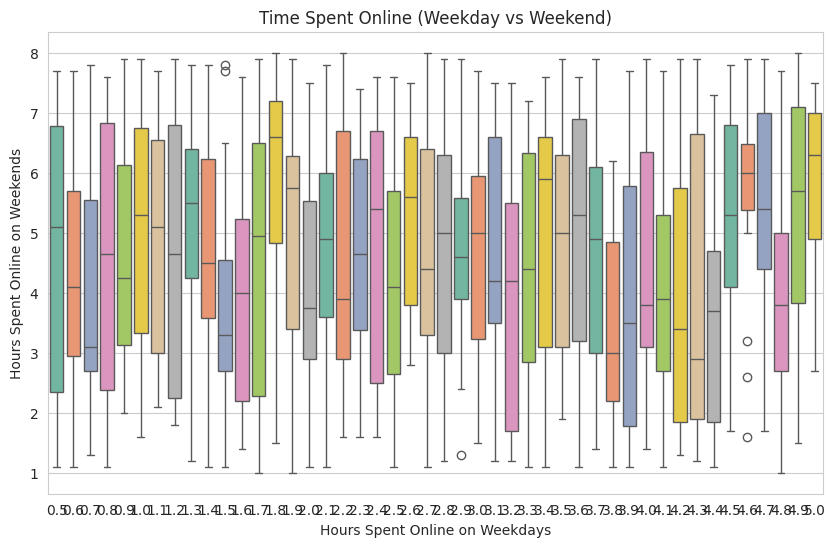

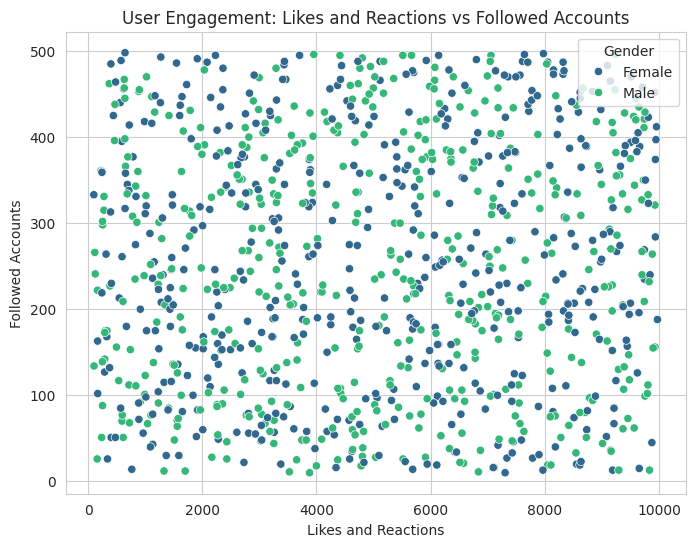

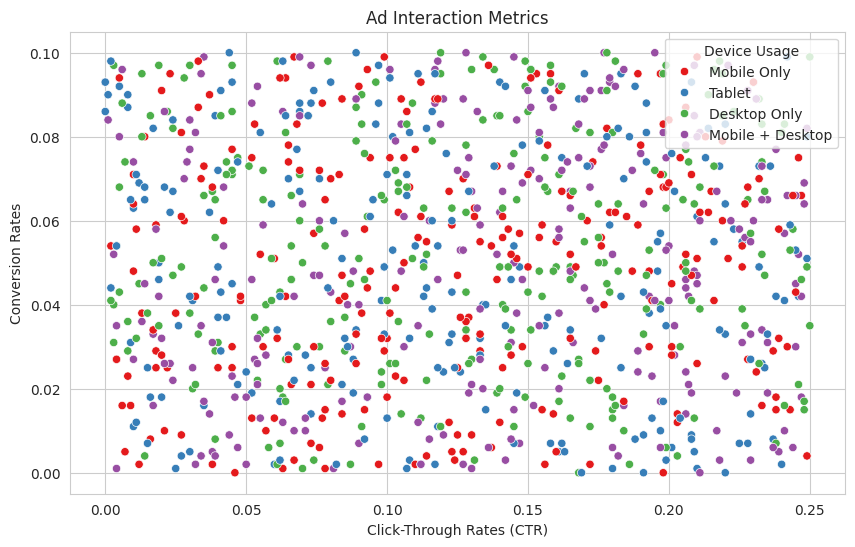

<ipython-input-86-77e0f87e1461>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Device Usage', y='Ad Interaction Time (sec)', data=df, palette='Paired')


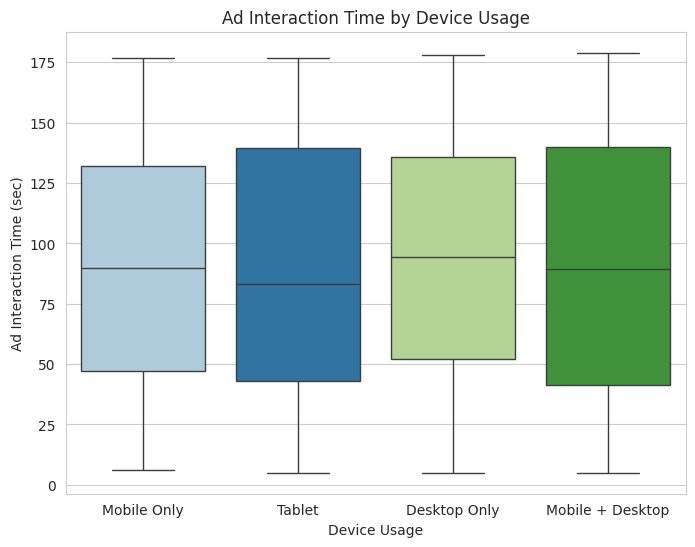

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='Time Spent Online (hrs/weekday)', y='Time Spent Online (hrs/weekend)', data=df, palette='Set2')
plt.title('Time Spent Online (Weekday vs Weekend)')
plt.xlabel('Hours Spent Online on Weekdays')
plt.ylabel('Hours Spent Online on Weekends')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Likes and Reactions', y='Followed Accounts', data=df, hue='Gender', palette='viridis')
plt.title('User Engagement: Likes and Reactions vs Followed Accounts')
plt.xlabel('Likes and Reactions')
plt.ylabel('Followed Accounts')
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Click-Through Rates (CTR)', y='Conversion Rates', data=df, hue='Device Usage', palette='Set1')
plt.title('Ad Interaction Metrics')
plt.xlabel('Click-Through Rates (CTR)')
plt.ylabel('Conversion Rates')
plt.legend(title='Device Usage')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Device Usage', y='Ad Interaction Time (sec)', data=df, palette='Paired')
plt.title('Ad Interaction Time by Device Usage')
plt.xlabel('Device Usage')
plt.ylabel('Ad Interaction Time (sec)')
plt.show()


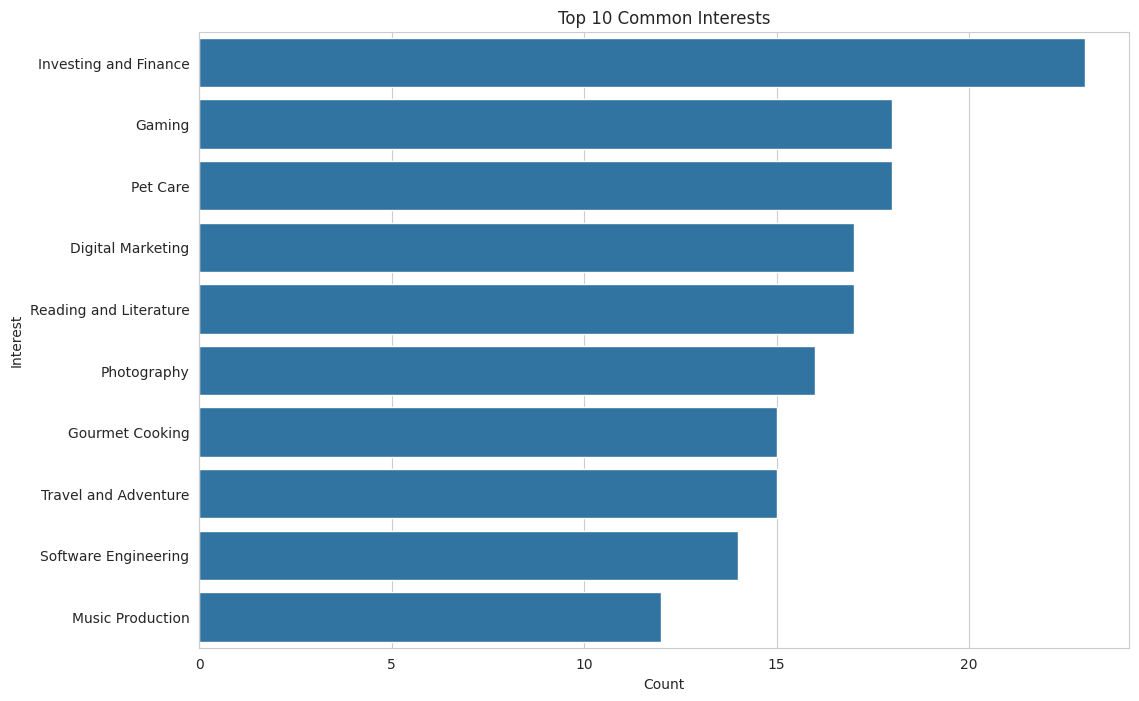

In [87]:
plt.figure(figsize=(12, 8))
interest_counts = df['Top Interests'].value_counts().head(10)
sns.barplot(x=interest_counts.values, y=interest_counts.index, orient='h')
plt.title('Top 10 Common Interests')
plt.xlabel('Count')
plt.ylabel('Interest')
plt.show()

['20k-40k' '0-20k' '60k-80k' '100k+' '40k-60k' '80k-100k']
No data available for standardization.


<ipython-input-88-ea4c1f1dd852>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Income Level'] = pd.to_numeric(X['Income Level'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


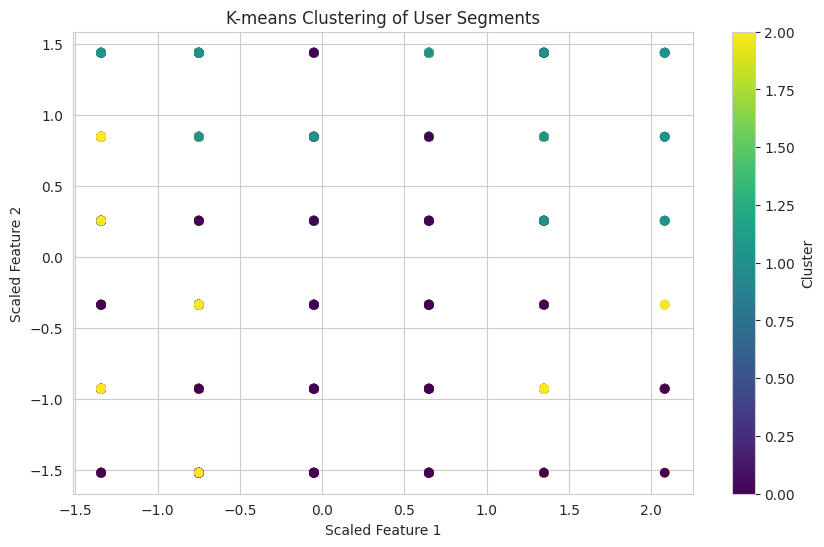

In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df['Age'] = df['Age'].map(age_mapping)


print(df['Income Level'].unique())

features = ['Age', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
X = df[features]

X['Income Level'] = pd.to_numeric(X['Income Level'], errors='coerce')


X = X.dropna()


scaler = StandardScaler()
if X.shape[0] > 0:
    X_scaled = scaler.fit_transform(X)
else:
    print("No data available for standardization.")

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.title('K-means Clustering of User Segments')
plt.colorbar(label='Cluster')
plt.show()


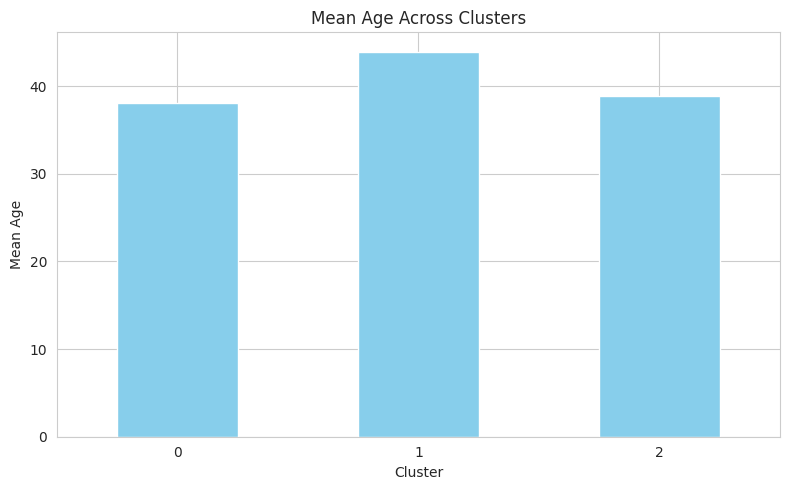

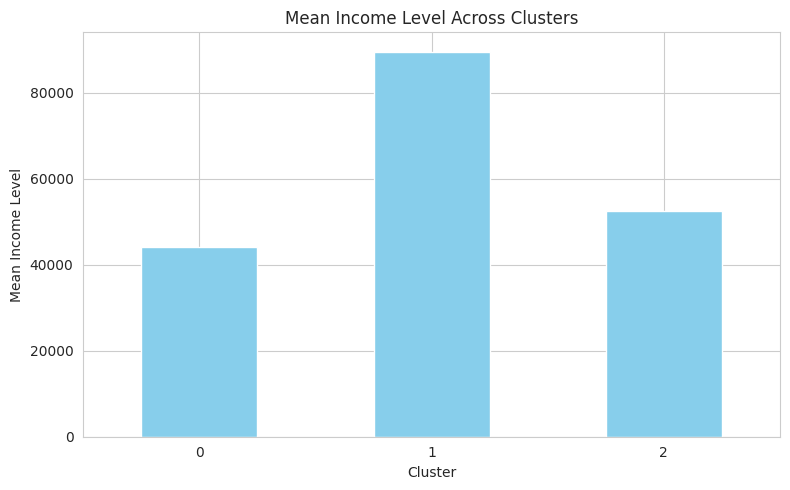

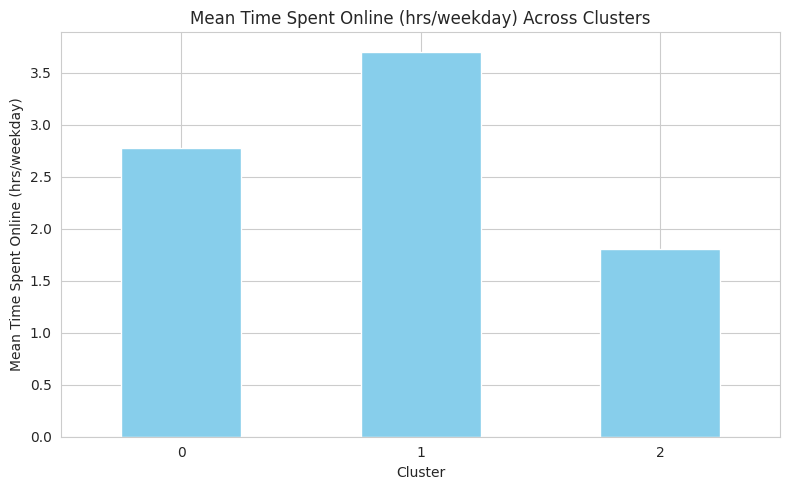

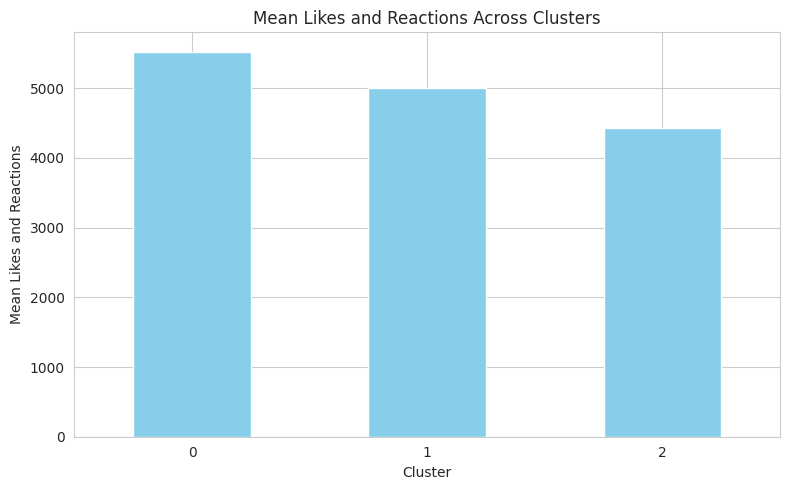

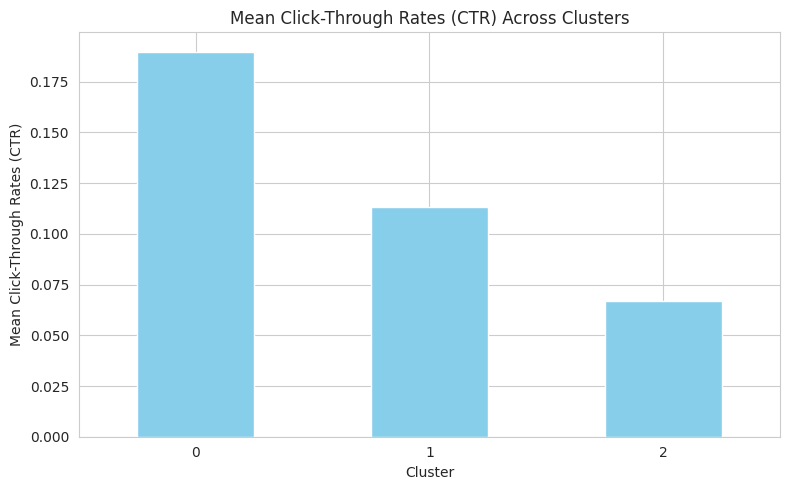

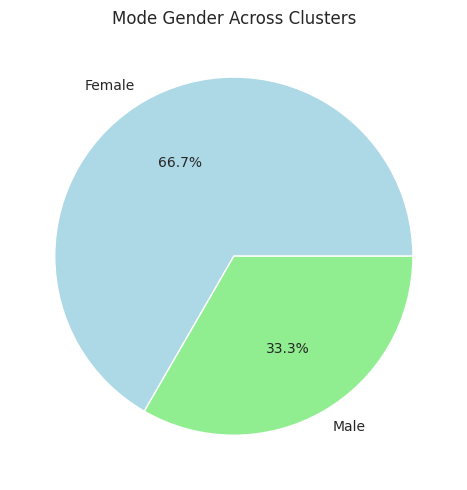

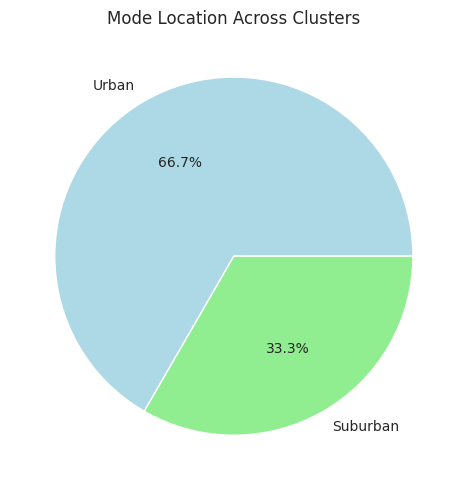

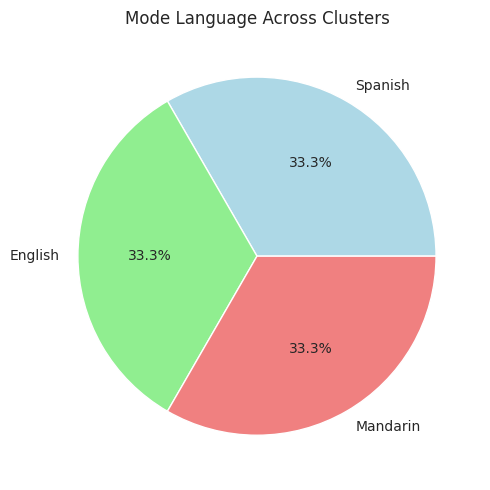

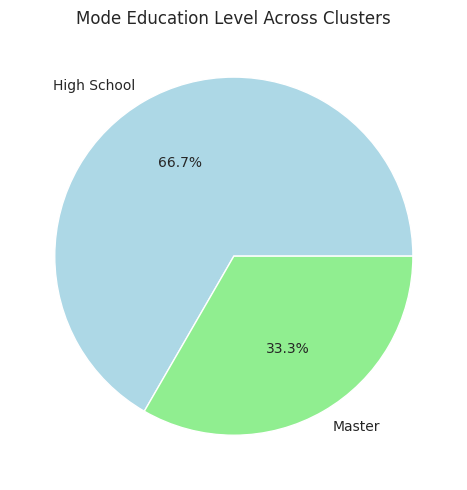

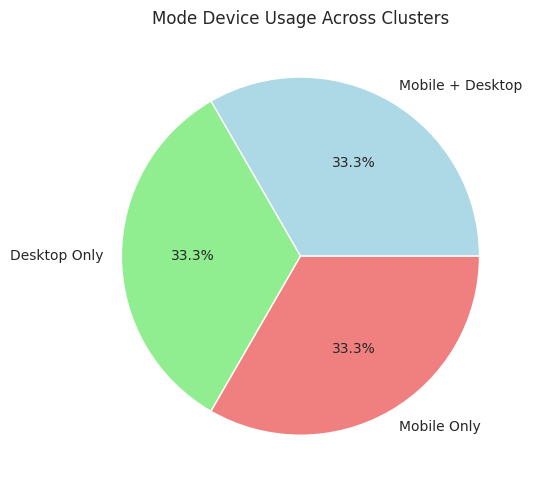

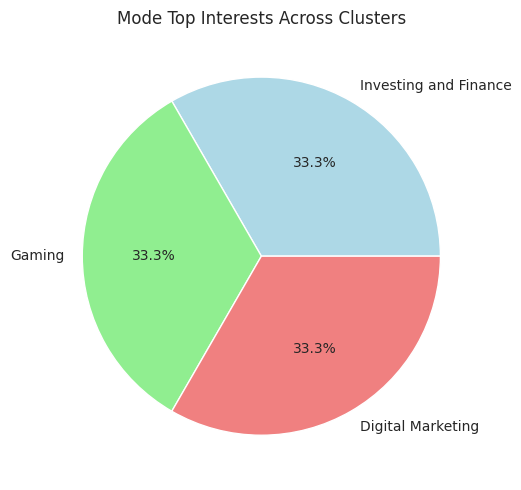

In [89]:


def plot_cluster_stats(stats_df):

    numerical_features = ['Age', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Likes and Reactions', 'Click-Through Rates (CTR)']
    for feature in numerical_features:
        plt.figure(figsize=(8, 5))
        stats_df[feature].plot(kind='bar', color='skyblue')
        plt.title(f'Mean {feature} Across Clusters')
        plt.xlabel('Cluster')
        plt.ylabel(f'Mean {feature}')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()


    categorical_features = ['Gender', 'Location', 'Language', 'Education Level', 'Device Usage', 'Top Interests']
    for feature in categorical_features:
        plt.figure(figsize=(8, 5))
        stats_df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
        plt.title(f'Mode {feature} Across Clusters')
        plt.ylabel('')
        plt.tight_layout()
        plt.show()


plot_cluster_stats(cluster_stats)


   User ID  Cluster           Cluster Name
0        1        0       Weekend Warriors
1        2        2          Low-Key Users
2        3        1  Engaged Professionals
3        4        1  Engaged Professionals
4        5        0       Weekend Warriors
5        6        1  Engaged Professionals
6        7        1  Engaged Professionals
7        8        2          Low-Key Users
8        9        2          Low-Key Users
9       10        1  Engaged Professionals


<ipython-input-90-fa6d3eebc524>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster Name', data=df, palette='viridis', order=df['Cluster Name'].value_counts().index)


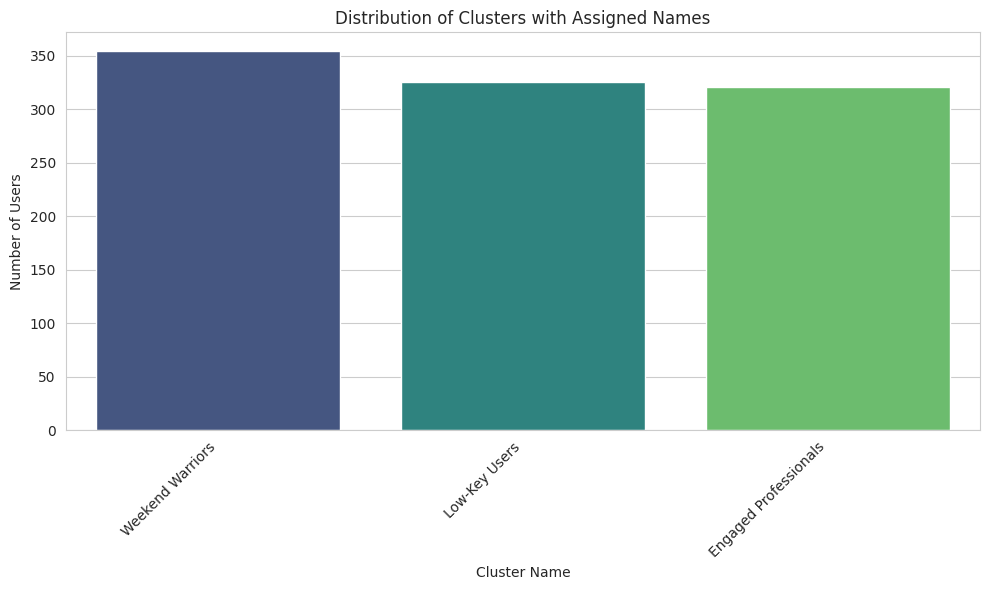

In [90]:
cluster_names = {
    0: "Weekend Warriors",
    1: "Engaged Professionals",
    2: "Low-Key Users",
    3: "Active Explorers",
    4: "Budget Browsers"
}
df['Cluster Name'] = df['Cluster'].map(cluster_names)


print(df[['User ID', 'Cluster', 'Cluster Name']].head(10))


plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster Name', data=df, palette='viridis', order=df['Cluster Name'].value_counts().index)
plt.title('Distribution of Clusters with Assigned Names')
plt.xlabel('Cluster Name')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

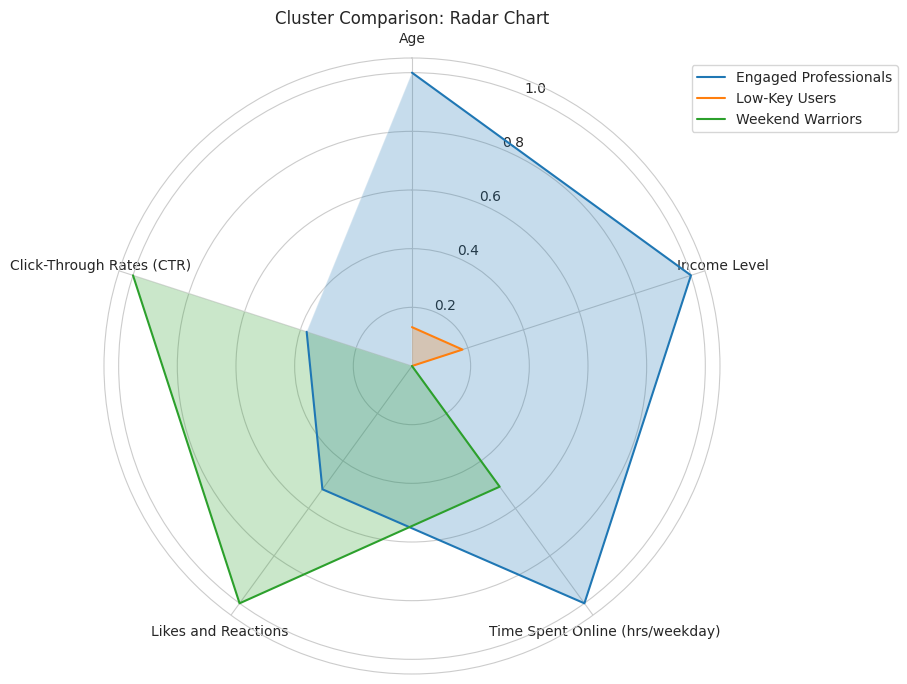

In [91]:
# Map income ranges to their median values
income_mapping = {
    '0-20k': 10000,
    '20k-40k': 30000,
    '40k-60k': 50000,
    '60k-80k': 70000,
    '80k-100k': 90000,
    '100k+': 110000
}
df['Income Level'] = df['Income Level'].map(income_mapping)



# Define the features to be used in the radar chart
features = ['Age', 'Income Level', 'Time Spent Online (hrs/weekday)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# Calculate the mean values of selected features for each cluster
cluster_means = df.groupby('Cluster Name')[features].mean().reset_index()

# Normalize the mean values to bring them to a common scale
min_max_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
cluster_means_norm = cluster_means[features].apply(min_max_scaler)

# Set up the radar chart parameters
labels = features
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each cluster's radar chart
# Plot each cluster's radar chart
for i, row in cluster_means_norm.iterrows():
    values = row.values.flatten().tolist()
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=cluster_means['Cluster Name'][i])


plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Cluster Comparison: Radar Chart')


ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

plt.show()